In [32]:
import pandas as pd
import sqlalchemy as sql
from MCForecastTools import MCSimulation

In [4]:
recessions={
    'savings_and_loans_crisis': pd.date_range('1990-07', '1991-03'), 
    'dot_com_bust': pd.date_range('2001-03', '2001-11'), 
    'great_recession': pd.date_range('2007-12', '2009-06'), 
    'covid': pd.date_range('2020-04', '2020-06'), 
    # subject to change
    'current': pd.date_range('2022-01', '2022-08-09')
}

In [7]:
engine=sql.create_engine('sqlite:///recession_analysis.db')

In [39]:
sql_query=f'select * from price_history'
price_history=pd.read_sql(sql_query, con=engine, index_col='Date', parse_dates='Date')

price_history=price_history.pivot(columns='ticker', values='Close')
price_history.head()

ticker,IYT,MSCI,SPY,VENAX,VGHCX,^IXIC
Date,,,,,,
1971-02-05,NaN,NaN,NaN,NaN,NaN,100.000000
1971-02-08,NaN,NaN,NaN,NaN,NaN,100.839996
1971-02-09,NaN,NaN,NaN,NaN,NaN,100.760002
1971-02-10,NaN,NaN,NaN,NaN,NaN,100.690002
1971-02-11,NaN,NaN,NaN,NaN,NaN,101.449997


In [48]:
simulation_history=price_history[price_history.index.isin(recessions['great_recession'])]
simulation_history.head()

ticker,IYT,MSCI,SPY,VENAX,VGHCX,^IXIC
Date,,,,,,
2007-12-03,69.420410,25.673067,110.381889,36.415932,46.338245,2637.129883
2007-12-04,69.546188,26.939741,109.395256,36.115749,46.326195,2619.830078
2007-12-05,70.770569,26.875490,111.226479,36.757030,46.654266,2666.360107
2007-12-06,72.288460,26.535881,112.818504,37.718929,46.675331,2709.030029
2007-12-07,73.286407,26.508341,112.796074,37.630241,46.557961,2706.159912


<AxesSubplot:xlabel='Date'>

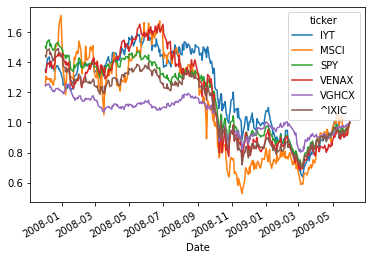

In [50]:
(simulation_history/simulation_history.iloc[-1]).plot()

In [51]:
simulation_history.columns=pd.MultiIndex.from_product([simulation_history.columns, ['close']], names=('data', 'ticker'))
simulation_history.head()

data,IYT,MSCI,SPY,VENAX,VGHCX,^IXIC
ticker,close,close,close,close,close,close
Date,,,,,,
2007-12-03,69.420410,25.673067,110.381889,36.415932,46.338245,2637.129883
2007-12-04,69.546188,26.939741,109.395256,36.115749,46.326195,2619.830078
2007-12-05,70.770569,26.875490,111.226479,36.757030,46.654266,2666.360107
2007-12-06,72.288460,26.535881,112.818504,37.718929,46.675331,2709.030029
2007-12-07,73.286407,26.508341,112.796074,37.630241,46.557961,2706.159912


In [52]:
100/6

16.666666666666668

In [53]:
weights=[.166, .166, .166, .166, .166, .166]
display(sum(weights))
MC_even_weight=MCSimulation(
    portfolio_data=simulation_history,
    weights=weights,
    num_simulation=200,
    num_trading_days=252
)

0.9960000000000001

In [54]:
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011246,1.004851,1.006499,0.990890,1.018054,1.024265,0.996686,0.998688,1.009134,1.022286,...,1.016199,1.007073,0.997154,0.988064,0.998754,0.979751,0.990949,1.025551,0.999443,0.975932
2,1.014728,0.997940,0.986518,0.991505,1.000455,1.019923,0.994977,0.992883,1.005419,1.024618,...,1.029875,0.988253,1.019279,0.983072,1.004907,0.994686,0.989990,1.023715,1.002411,0.982157
3,1.026300,1.009003,0.992627,0.980752,0.983406,1.010185,0.985201,0.982371,1.027081,1.014256,...,1.029485,0.980919,0.999253,0.983873,1.020720,1.005922,0.992633,1.033471,0.999232,0.984789
4,1.008510,1.023126,1.006386,0.993063,0.981799,0.993866,0.994766,0.968348,1.019449,1.034090,...,1.038440,0.975644,0.992216,0.970222,1.022262,1.006791,0.987097,1.037560,0.997975,0.985488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.889161,1.053215,0.690526,1.091138,0.948395,0.968548,0.784172,1.016361,1.493906,0.876063,...,0.769677,1.029352,0.660815,0.800353,0.656636,0.882447,1.067242,1.242335,1.136673,0.874709
249,0.879591,1.055726,0.694375,1.085629,0.939114,0.974173,0.785649,1.018618,1.451415,0.870084,...,0.765877,1.039817,0.655798,0.803209,0.647265,0.889836,1.094781,1.192134,1.135275,0.863699
250,0.898910,1.064829,0.692881,1.090951,0.918646,0.968801,0.794281,1.016837,1.438611,0.857275,...,0.760872,1.019929,0.661407,0.815715,0.646777,0.868520,1.073291,1.190649,1.139537,0.859202
251,0.923651,1.073144,0.699183,1.093812,0.912374,0.970714,0.782550,1.038023,1.405723,0.880777,...,0.758009,1.035890,0.646967,0.793823,0.647036,0.856362,1.067187,1.202151,1.129097,0.860780


<AxesSubplot:>

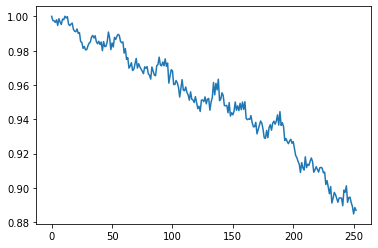

In [64]:
MC_even_weight.simulated_return.median(axis=1).plot()

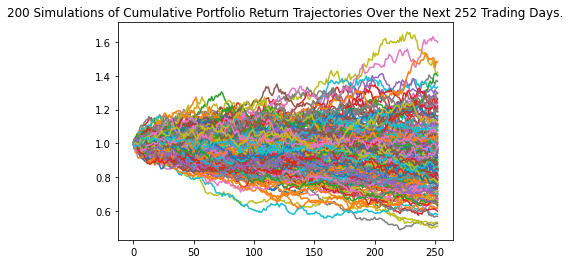

In [55]:
even_weight_line_plot=MC_even_weight.plot_simulation()

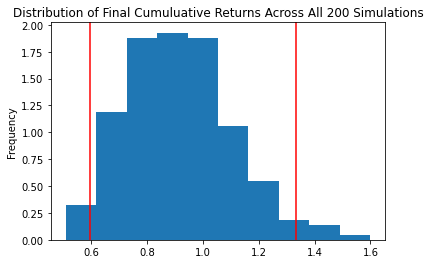

In [57]:
even_weight_distribution_plot=MC_even_weight.plot_distribution()

In [ ]:
# Results indicate overall down trend and that recovery may be a ways to go